# Jan 14, 2025: Our first HR Diagram

*Due January 15 at 5pm. For this assignment, please a) click Kernel > Restart & Run All to erase the output and re-run everything, b) save a pdf of this jupyter notebook to upload to Canvas. You can create a pdf by going to File > Download as > PDF via LaTeX. 

Our goal is to create a Hertsprung-Russell (HR, or color-magnitude diagram) based on the data from the Henry Draper catalog, created over a century ago. Before getting started, let's import the packages we need.

In [1]:
from tokenize import String

import numpy as np
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt

# i'm not going to use the shared_dir because I'm running this locally
shared_dir = '/home/jovyan/shared/PHYS31/' # variable for the shared directory path

# PART 1: Using tables to access data

*We will work on this part on January 17th in class*

I've already merged two catalogs into one, and then filtered the resulting table to select only the rows I want to use for this exercise. The two tables are:

Table 1, the HD catalog: <url>https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=III/135A</url> From this catalog, we are taking spectral types for stars.

Table 2, the Hipparcos-Tycho Catalog: <url>https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=I/239/hip_main</url> From this catalog, we are using distances and magnitudes of stars.

## Reading the data

There are two ways to read in the table, which is a file called "HD_HIP_filtered.csv" (csv means comma-separated-values). First, open up the CVS file using another program so you can see what it looks like.

Now, we can read in the table using python, and store the result so that we can access the whole table. There are two good ways to do this. The `astropy` library contains a module `table` that is very helpful, and has some great customization for formats used by astronomers. But, we could also use the `pandas` library, which is used most in the data science community. Pandas tables (called **dataframes**) are very powerful, as we'll see later. I generally use `astropy` to read in tables, and then convert the table to do a pandas dataframe.

In [2]:
catalog = Table.read('Tables/HD_HIP_filtered.csv') # read in the catalog
df = catalog.to_pandas() # convert to a Pandas dataframe

# you could also read the file in using pandas like this:
# df = pd.read_csv('HD_HIP_filtered.csv', header=0)

Below I print out the first five rows of the table. The top two rows show the column name, and the type of data used in that column. `float` are floating point numbers, which means they use decimals. `int` are integers. In this table, both the floats and integers are 64-bits, which specifies the amount of memory allowed (64 bits allows for very large numbers). 

In [3]:
df.head() # print out the catalog; .head() prints out only the first five rows)

,HD,DM,RAB1900,DEB1900,q_Ptm,Ptm,n_Ptm,q_Ptg,Ptg,n_Ptg,...,Plx,pmRA,pmDE,e_Plx,B-V,Notes,_RA_icrs_1,_DE_icrs_1,use,category
0,213087,BD+64 1664,335.975,64.616667,0,5.66,NaN,1,5.42,NaN,...,1.29,-0.74,-1.93,0.55,0.302,NaN,336.772126,65.132270,True,B0
1,41398,BD+28 1008,89.950,28.933333,0,7.45,NaN,1,7.21,NaN,...,-1.30,-0.43,0.45,1.02,0.306,NaN,91.527303,28.934781,True,B0
2,188209,BD+46 2793,297.250,46.783333,0,5.51,NaN,1,5.27,NaN,...,0.22,-2.76,-3.99,0.48,-0.078,NaN,297.996122,47.027339,True,B0
3,248753,BD+25 1019,86.825,25.716667,<NA>,NaN,NaN,0,8.40,NaN,...,2.53,-0.80,-1.23,1.18,0.230,NaN,88.379592,25.742245,True,B0
4,122324,CP-55 5841,209.025,-55.516667,1,9.40,NaN,0,9.20,NaN,...,0.31,-6.60,-4.25,1.25,0.292,NaN,210.703762,-56.004131,True,B0


In [4]:
# list all of the columns present
df.columns

Index(['HD', 'DM', 'RAB1900', 'DEB1900', 'q_Ptm', 'Ptm', 'n_Ptm', 'q_Ptg',
       'Ptg', 'n_Ptg', 'SpT', 'Int', 'Rem', '_RA_icrs', '_DE_icrs', 'HIP',
       'RAhms', 'DEdms', 'Vmag', 'RAICRS', 'DEICRS', 'Plx', 'pmRA', 'pmDE',
       'e_Plx', 'B-V', 'Notes', '_RA_icrs_1', '_DE_icrs_1', 'use', 'category'],
      dtype='object')

## Navigating through the table

We can access columns and rows of data. For example, to print out the columns with names `HD` and `DM`, I would write: `catalog[['HD','DM']]`, where I supplied the names of the columns I wanted to include inside of square brackets. We can also access only one column, or only one row.

In [5]:
# access just one column from the table
df['HD'].head()

0    213087
1     41398
2    188209
3    248753
4    122324
Name: HD, dtype: int64

In [6]:
# print out all of the information for the star in the 6th row 
# note: python indexing starts from 0, so #5 is actually the 6th entry

df.loc[5]

HD                 236589
DM             BD+55  215
RAB1900            13.025
DEB1900         55.883333
q_Ptm                   0
Ptm                   9.0
n_Ptm                 NaN
q_Ptg                <NA>
Ptg                   0.0
n_Ptg                 NaN
SpT                    B0
Int                   NaN
Rem                   NaN
_RA_icrs        14.503386
_DE_icrs        56.424128
HIP                  4532
RAhms         00 58 01.81
DEdms         +56 25 52.1
Vmag                 9.33
RAICRS          14.507534
DEICRS          56.431138
Plx                   2.8
pmRA                -0.44
pmDE                -1.82
e_Plx                1.22
B-V                  0.15
Notes                 NaN
_RA_icrs_1      14.507532
_DE_icrs_1      56.431133
use                  True
category               B0
Name: 5, dtype: object

### 1.a.i Printing out information

There are three different star names in this table: the HD number (which is the ID of the star in the Henry Draper Catalog), the DM code (which is the ID of the star in the Durchmusterung Catalog), and HIP number (which is the ID of the star in the Hipparcos Catalog). The first two come from the HD catalog (1st Vizier link) and the latter from the Hipparcos-Tycho catalog (2nd Vizier link). I merged these two catalogs together, but let's check to see that the names all match.

Let's take for our example the star in the nth column (everyone choose a different n). First, see if you can figure out how to print out only the HD, DM, HIP, and SpT columns for only the nth row.

In [7]:
# printing HD, DM, HIP, and SpT for the 59485th star
df[['HD','DM','HIP','SpT']].loc[59485]

HD         128409
DM     CD-34 9798
HIP         71524
SpT            K0
Name: 59485, dtype: object

### 1.a.ii Checking against SIMBAD

We are going to check against the entry in the SIMBAD database (which isn't perfectly accurate but is still super useful!). Navigate to SIMBAD at <url>http://simbad.u-strasbg.fr/simbad/</url> and then use the "Search by identifier" option to search for the star above using its HD name.

What is the spectral type listed for this star? Scroll down to the identifiers section--can you verify that the DM and HIP numbers that our table says correspond to this star agree with what SIMBAD thinks?

<span style="color:blue">
The spectral type is listed as K0III C. On SIMBAD, the HIP number is listed as 71524 and the DM number is CD-34 9798, which agrees with our table.
</span>

### 1.b Print out the columns we need.

Using the links to the Vizier tables above, find the column names you'll need to access for this exercise: HD number, spectral type, V magnitude, B-V color, and parallax. Then, print out only those columns of the table. 

In [8]:
# printing the hd number, spectral type, v magnitude, b-v color, and parallax of star 59485
df[['HD','SpT','Vmag','B-V','Plx']].loc[59485]

HD      128409
SpT         K0
Vmag      7.77
B-V      1.133
Plx       3.47
Name: 59485, dtype: object

# PART 2: Analyzing the data

*You'll complete the rest of this exercise as homework*

Last time, we performed calculations on numbers. Python is very convenient because you can treat arrays the exact same way. I created an array called `sample_data`. Try multiplying or dividing the array that I created, then try putting the array to the power of 2 (squaring).

In [9]:
sample_data = np.array([1,2,3,4])

In [10]:
# multiplying the array by 2
sample_data*2

array([2, 4, 6, 8])

In [11]:
# squaring the array
sample_data**2

array([ 1,  4,  9, 16])

### 2.a. Create new columns of data for the distance to the star (in pc) and for the absolute V magnitude. 

Look up equations for the parallax and for absolute magnitude if you don't remember them (Wikipedia is fine). Check the units for the parallax column by looking at the Vizier table notes, and modify the parallax equation appropriately. Create new columns called `distance` and `absVmag`. An example is below, where I create a column called `Bmag` out of two other colums present in the data.

In [12]:
# creating a new column called Bmag that is the sum of the B-V and Vmag columns
df['Bmag'] = df['B-V'] + df['Vmag']

In [13]:
# negative parallax is erroneous, and it messes with the absolute value calculation, so I first remove the negative parallaxes
df = df[df['Plx']>0]

# creating the distance and absVmag columns; note that we have to multiply our answer by 1000 as parallax is in milliarcseconds
df['distance'] = (1/df['Plx']) * 1000
df['absVmag'] = df['Vmag'] - 5*np.log10(df['distance']) + 5

## Assessing the results

### 2.b.i. First checks

Check your work by printing out the parallax, distance, and absolute V magnitude columns. Are the numbers for absolute V magnitude reasonable for stars (google to find some numbers for comparison)? 



In [14]:
# printing the parallax, distance, and absolute V magnitude of star 59485
df[['Plx','distance','absVmag']].loc[59485]

Plx           3.470000
distance    288.184438
absVmag       0.471647
Name: 59485, dtype: float64

<span style="color:blue">
    Wikipedia states that "Absolute magnitudes of stars generally range from approximately −10 to +20" (https://en.wikipedia.org/wiki/Absolute_magnitude). The absolute magnitude of star 59485 is 0.47, which falls within this range, so it seems reasonable.
</span>

### 2.b.ii. Investgiating the error message

When you ran the code to calculate distance and absolute magnitude, what error did you receive? What part of the code did it come from? Looking at the results, what happens to absVmag when this error occurs?

<span style="color:red">
    C:/Users/Aryan Bawa/miniconda3/Lib/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
</span>

<span style="color:blue">
    -> I recieved the above error from the absolute magnitude calculation. It appears that an invalid value is passed through the log function, and that causes this error. THis means an invalid distance value is passed. I assume that the distance value is invalid because the parallax value is negative, which is not possible.
</span>

### 2.b.ii. Performing basic checks on our calculation

Next, do a basic check that we did the calculations correctly. We'll do this using HD 209458, which is a star in this catalog famous for having the first transiting exoplanet. In the most up-to-date catalogs, HD 209458 is about 49pc away and it is a G0 star. Our data is old, so our spectral type and distance won't match exactly, but they should be pretty close (if I messed up the catalog crossmatching, the spectral type would probaly just be dead wrong, and if we messed up the distance calculated it would likely be off by a factor of two or more). This only checks the parallax calculation; I can't think of a good way to check that we did the absolute V magnitude calculation right, though.

Print out the spectral type and distance in the catalog to compare to the values above. You can select a row in the catalog based on where a condition is true like this: `df.loc[df['HD']==209458]`

In [15]:
# printing the spectral type and distance of star HD 209458
df[['SpT', 'distance']].loc[df['HD']==209458]

,SpT,distance
34796,F8,47.080979


Does this agree?

<span style="color:blue">
    The data does not agree with the current data, but it is quite close. The spectral type is listed as F8, and the distance is listed as 47.08 pc. According to https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html, G0 stars have an effective temperature of around 6050K while F8 stars have an effective temperature of 6300K. This means that the spectral type is close to the current data, but not exactly the same. The distance is also close to the current data, but not exactly the same.
</span>

# Plotting the data

Here's the introduction to matplotlib we looked through together in class: <url>https://matplotlib.org/stable/tutorials/introductory/pyplot.html</url>

## The spectral type-absolute magnitude diagram

The data are plotted below, but the plot isn't very user-friendly at the moment, as I think you'll agree!

### 3.a. Make a scatter plot.

You can do this by either using `plt.scatter` or by channging the marker symbol for `plt.plot`. After you've done this, try changing the opacity of the points (I've set it at alpha=0.8) and see what effect this has on your ability to understand the plot.

### 3.b. Add axes labels.

### 3.c. Change the axes limits to best show the data. 

In particular, for the y axis, make the axis go from large numbers to small numbers. This helps make the plot more intuitive: smaller magnitudes means brighter stars, and our brains usually want bright things to be higher up on plots. I think increasing the font size might also be nice.

Use online resources to figure out how to do this, for example: 
https://matplotlib.org/stable/users/explain/quick_start.html


(10.0, -10.0)

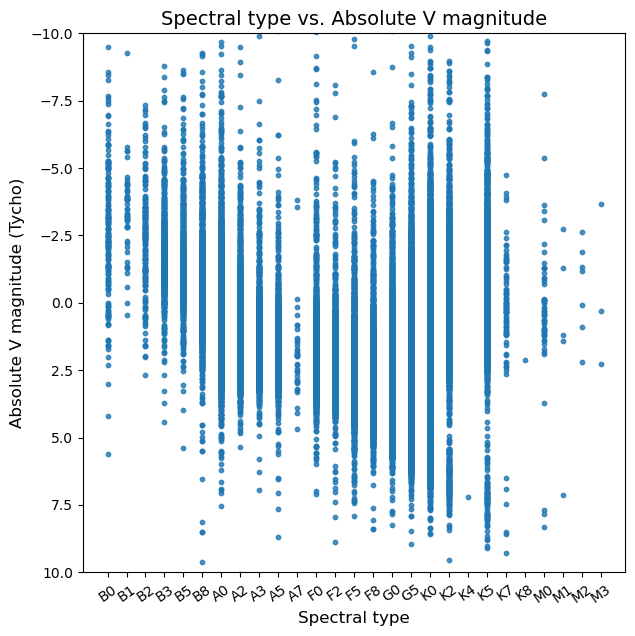

In [16]:
# making the plot itself
plt.figure(figsize=(7,7)) # sets the figure size, in inches# this line sorts the spectral types in order of the alphabet
plt.scatter(df['SpT'], df['absVmag'], alpha=0.8, s = 10) # alpha=0.8 sets the opacity to semi-transparent.

# adding labels
plt.xlabel('Spectral type', fontsize = 12)
plt.ylabel('Absolute V magnitude (Tycho)', fontsize = 12)
plt.xticks(rotation=35, fontsize = 10) # this rotates the x-axis labels so they don't overlap and sets font size
plt.yticks(fontsize = 10) # this sets the font size of the y-axis labels
plt.title('Spectral type vs. Absolute V magnitude', fontsize = 14)

# change axes limits
plt.ylim(10,-10)

# # this compresses the figure so everything fits better
# # mostly important for when you print figures out
# plt.tight_layout()

## The color-absolute magnitude diagram (CMD)

### 3.c. Make a version of the H-R diagram using color on the x axis instead of spectral type.

Using spectral type makes the plot a bit difficult to interpret because it's a course binning, so the version with color will be easier to interpret.

(-0.5, 2.5)

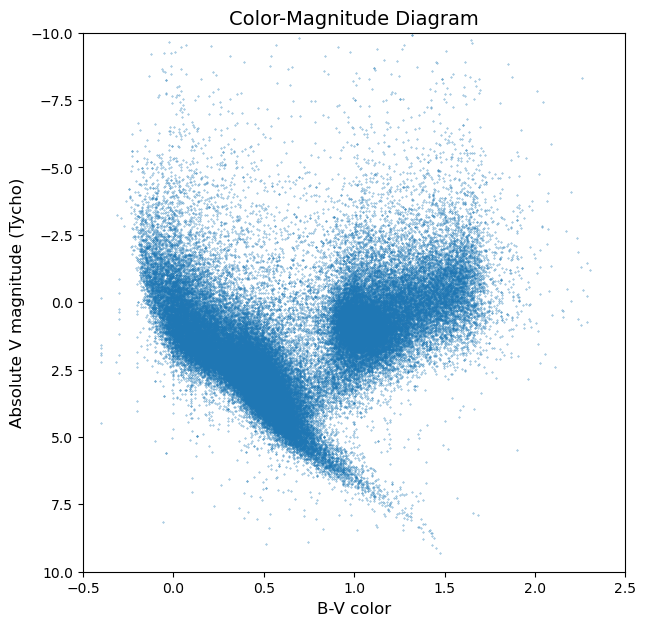

In [17]:
# creating plot
plt.figure(figsize=(7,7))
plt.scatter(df['B-V'], df['absVmag'], alpha=0.8, s = 0.1)

# adding labels
plt.xlabel('B-V color', fontsize = 12)
plt.ylabel('Absolute V magnitude (Tycho)', fontsize = 12)
plt.title('Color-Magnitude Diagram', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# change axes limits
plt.ylim(10,-10)
plt.xlim(-0.5, 2.5)

## Further investigations in the CMD

### 3.d.i. Make a plot showing how color and spectral type are related.

(-0.5, 3.0)

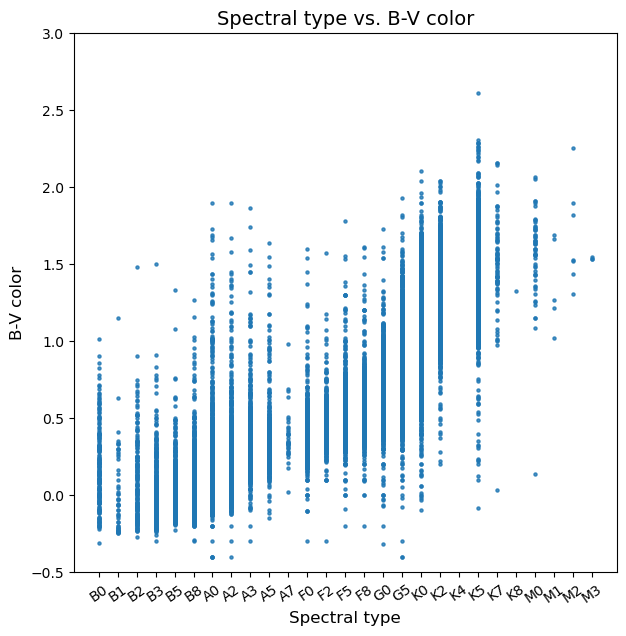

In [18]:
# creating plot
plt.figure(figsize=(7,7))
plt.scatter(df['SpT'], df['B-V'], alpha=0.8, s = 5)

# adding labels
plt.ylabel('B-V color', fontsize = 12)
plt.xlabel('Spectral type', fontsize = 12)
plt.title('Spectral type vs. B-V color', fontsize = 14)
plt.xticks(rotation=35, fontsize = 10)
plt.yticks(fontsize = 10)

# change axes limits
plt.ylim(-0.5,3)

### 3.d.ii. Looking at the color-magnitude H-R diagram, what are the main luminosity classes of stars that you are seeing?


<span style="color:blue">
    It appears that the two main luminosity classes we see are main sequence stars and giants. The main sequence stars form the line from the bottom right to the top left of the plot and the giants branch off at about 3 on the absolute V magnitude axis.
</span>

# Origins of the data

Table 1, the HD catalog: <url>https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=III/135A</url> Click on the link that says `1993yCat.3135....0C` to get to the reference on ADS. This particular reference is a bit odd, because it lists the year as 1993--that's the year the electronic catalog was created (the original paper is about a hundred years old). From this catalog, we are taking spectral types for stars.

Table 2, the Hipparcos-Tycho Catalog: <url>https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=I/239/hip_main</url> Navigate to the ADS reference for this source. This one is also a bit odd, because the table stands alone and is not associated with a specific paper. From this catalog, we are using distances and magnitudes of stars.

### 4.a. Using the links to the ADS listings on the Vizier links, describe the HD and Tycho catalogs. 

Make sure to discuss: What are their origins? What type of data do they contain?

<span style="color:blue">
    The Henry Draper (HD) Catalogue is a star catalog that was originally published between 1918 and 1924 that contains spectral types for 225,300 stars. Edward Pickering at the Harvard College observatory was the director of the project, and Annie Jump Cannon was the primary author of the catalog. The digitized version cited by the Vizier link was published in 1989, and it contains the machine readable portion of the Henry Draper Extension (HDE) Catalogue from 1925-1936. These full catalogues cover almost the entire sky down to an apparent magnitude of about 9. The catalog lists HD numbers, Durchmusterung numbers, positions for equinox B1900, visal and photographic magnitudes, spectral types, codes for the intensity of the spectra used, and remarks. The Hipparchos mission was launched by the ESA in 1989 as the first space based astrometry mission with the goal of pinpointing the position of hundreds of thousands of stars. The Tycho catalog was created from the data collected by the Hipparchos mission and contains the general positions, parallaxes, and proper motions of about one million stars. The Hipparchos catalog is a subset of the Tycho catalog and contains extremely accurate positions and proper motions of 118,218 stars.
</span>

### 4.b. Main sequence M stars are the most common type of star in the Galaxy, why aren't many of them in the HD and Tycho catalogs?

Consider how the observations were conducted, what the limits of the observations were.

<span style="color:blue">
    M-type stars are among the faintest stars in the night sky, with absolute magnitudes ranging from 8 to 20. The apparent magnitudes of these stars is even greater than this, so they are extremely faint. The HD catalogue was only able to catalogue stars up to a visual magnitude of 9 in extremely ideal conditions, as all observations were ground based. The Hipparchos mission was the first space-based astrometry mission, and its onboard equipment was only able to see stars with a visual magnitude of 11. This means that the vast majority of M-type stars are too faint to be seen by either the HD or Tycho catalogs.
</span>

### 4.c. Who was Annie Jump Cannon and how is she related to this assignment?
<span style="color:blue">
    Annie Jump Cannon was an early 19th century astronomer most known for the development of the Harvard Classification Scheme, which is the basis for the spectral classification of stars that we use today (OBAFGKM). She worked under Edward Pickering at the Harvard Observatory while he was developing the Henry Draper Catalogue, but she eventually took over as the the primary author. She was responsible for classifying over 350,000 stars in her lifetime and published 9 volumes of the HD catalogue.
</span>